If you want to get something done you should start from the start. This is Day 1 of orientation microscopy. We create a fake pattern. We create a library that contains the fake pattern, and some other patterns. We check the process works as expected. This is for a single DP though.

In [1]:
import numpy as np
import pyxem as pxm
from matplotlib import pyplot as plt
import hyperspy.api as hs

In [2]:
from pyxem.diffraction_generator import DiffractionSimulation
from pyxem.indexation_generator import correlate_library

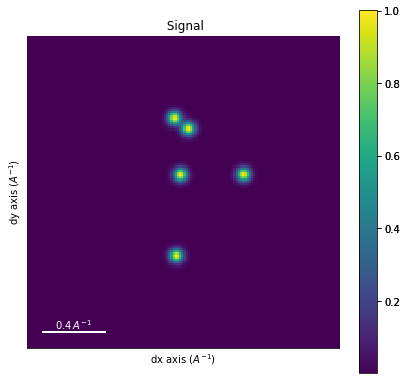

0.001


In [3]:
coords = (np.random.rand(5,2)-0.5) #zero mean, range 2
dp_sim = DiffractionSimulation(coordinates=coords,intensities=np.ones_like(coords[:,0]))
dp = dp_sim.as_signal(144,0.03,1,mode='legacy') 
dp.data = dp.data+0.001 #issue raised about need for this.
dp.plot(cmap='viridis')
plt.show()
print(np.min(dp.data))

In [4]:
### Build a fake library:

library = dict()
library["Phase"] = {}
for rotation in [(1,1,1),(0,0,0),(0,1,0)]:
    if rotation == (1,1,1):
        library["Phase"][rotation] = dp_sim
    else:
        local_cords = np.random.rand(5,2)
        library["Phase"][rotation] = DiffractionSimulation(coordinates=local_cords,intensities=local_cords[:,0])

In [5]:
library['Phase'][(0,1,0)]

In [6]:
correlate_library(dp.data, library,n_largest=2)

array([[  0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.75011902e-04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.31471420e-04]])

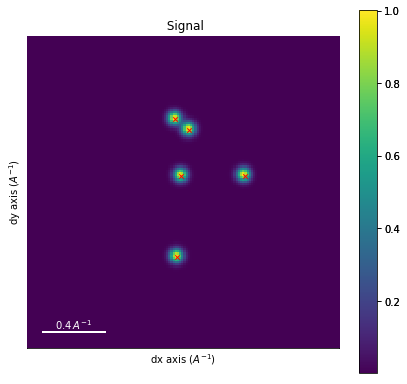

In [7]:
dp.plot(cmap='viridis') 
for row in coords:
    m = hs.markers.point(x=row[0],y=row[1],color='red',marker='x')
    dp.add_marker(m,plot_marker=True,permanent=True)

plt.show()